In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df= pd.read_csv('customer_data.csv')
df.head()

,CustomerID,Gender,Age,City,Income,SpendingScore,Subscription,Churn,SignupDate,VisitsPerMonth
0,1001,Male,49,San Francisco,84638,39,Basic,No,2023-04-29,1
1,1002,Female,56,Houston,98666,67,Premium,No,2023-01-20,3
2,1003,Male,66,Chicago,110067,45,Basic,No,2023-09-18,0
3,1004,Male,69,Chicago,92215,13,Premium,No,2023-10-20,1
4,1005,Male,49,San Francisco,94042,92,Gold,No,2023-09-13,1


In [27]:
df.tail()

,CustomerID,Gender,Age,City,Income,SpendingScore,Subscription,Churn,SignupDate,VisitsPerMonth
195,1196,Female,47,Houston,97124,84,Premium,No,2023-01-16,1
196,1197,Female,55,Chicago,51790,88,Basic,No,2023-04-18,6
197,1198,Female,55,New York,50289,69,Gold,No,2023-11-07,2
198,1199,Male,62,San Francisco,80129,34,Basic,No,2023-08-15,5
199,1200,Male,68,New York,118714,6,Basic,No,2023-06-19,3


In [28]:
df.count()

CustomerID        200
Gender            200
Age               200
City              200
Income            200
SpendingScore     200
Subscription      200
Churn             200
SignupDate        200
VisitsPerMonth    200
dtype: int64

In [29]:
df.count(axis=1)


0      10
1      10
2      10
3      10
4      10
       ..
195    10
196    10
197    10
198    10
199    10
Length: 200, dtype: int64

In [30]:
df.dtypes

CustomerID         int64
Gender            object
Age                int64
City              object
Income             int64
SpendingScore      int64
Subscription      object
Churn             object
SignupDate        object
VisitsPerMonth     int64
dtype: object

In [31]:
df.describe()

,CustomerID,Age,Income,SpendingScore,VisitsPerMonth
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1100.500000,44.405000,75775.490000,50.295000,3.865000
std,57.879185,15.353816,28146.610159,29.098999,1.877338
min,1001.000000,18.000000,25412.000000,1.000000,0.000000
25%,1050.750000,32.750000,51592.500000,26.000000,3.000000
50%,1100.500000,46.000000,76613.500000,51.000000,4.000000
75%,1150.250000,56.000000,98864.500000,75.000000,5.000000
max,1200.000000,69.000000,119758.000000,99.000000,10.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   City            200 non-null    object
 4   Income          200 non-null    int64 
 5   SpendingScore   200 non-null    int64 
 6   Subscription    200 non-null    object
 7   Churn           200 non-null    object
 8   SignupDate      200 non-null    object
 9   VisitsPerMonth  200 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 15.8+ KB


In [33]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
City              0
Income            0
SpendingScore     0
Subscription      0
Churn             0
SignupDate        0
VisitsPerMonth    0
dtype: int64

In [34]:
df['CustomerID'].duplicated().sum()

np.int64(0)

In [35]:
df['Churn'].value_counts()

Churn
No     156
Yes     44
Name: count, dtype: int64

In [36]:
df['SignupDate']= pd.to_datetime(df['SignupDate'])
print(df['SignupDate'].dtype)

datetime64[ns]


In [37]:
df.rename(columns={'Churn':'Churned'})

,CustomerID,Gender,Age,City,Income,SpendingScore,Subscription,Churned,SignupDate,VisitsPerMonth
0,1001,Male,49,San Francisco,84638,39,Basic,No,2023-04-29,1
1,1002,Female,56,Houston,98666,67,Premium,No,2023-01-20,3
2,1003,Male,66,Chicago,110067,45,Basic,No,2023-09-18,0
3,1004,Male,69,Chicago,92215,13,Premium,No,2023-10-20,1
4,1005,Male,49,San Francisco,94042,92,Gold,No,2023-09-13,1
...,...,...,...,...,...,...,...,...,...,...
195,1196,Female,47,Houston,97124,84,Premium,No,2023-01-16,1
196,1197,Female,55,Chicago,51790,88,Basic,No,2023-04-18,6
197,1198,Female,55,New York,50289,69,Gold,No,2023-11-07,2
198,1199,Male,62,San Francisco,80129,34,Basic,No,2023-08-15,5


<Axes: xlabel='Age'>

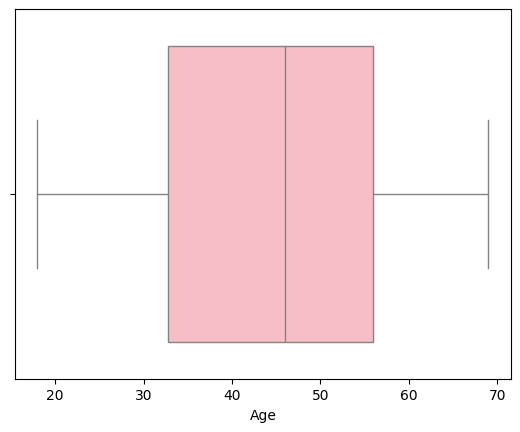

In [38]:
#ns.histplot(df['Age'], kde=True)
sns.boxplot(x=df['Age'], color='lightpink')


#This boxplot shows that most customers are of similar ages and there are **no unusual or extreme age values(outliers)** in the data.


<Axes: xlabel='Gender', ylabel='SpendingScore'>

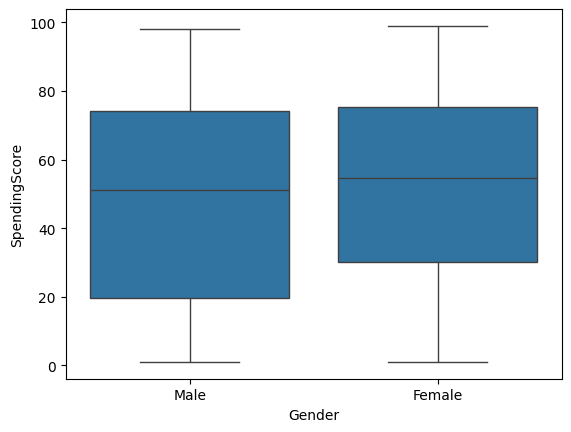

In [39]:
sns.boxplot(x='Gender', y='SpendingScore', data = df)


#From this plot we can conclude that females have slightly higher average spending (the middle line is a bit higher), and their spending scores are a bit more spread out than males. 


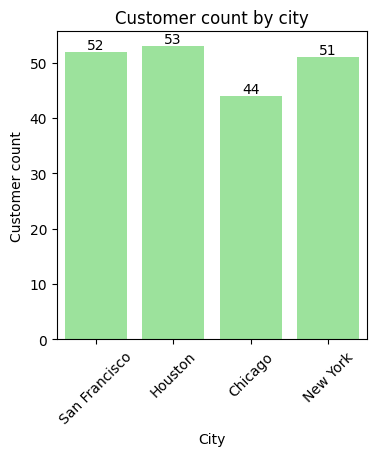

In [40]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x='City', data = df, color = 'lightgreen')
ax.bar_label(ax.containers[0])
plt.title('Customer count by city')
plt.ylabel('Customer count')
plt.xticks(rotation=45)
plt.show()

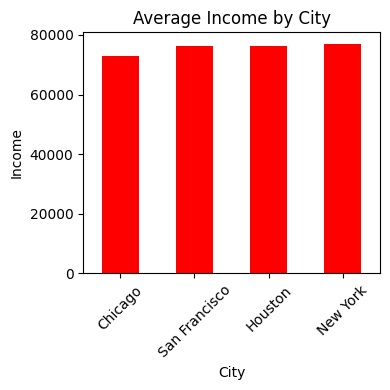

In [41]:
gb= df.groupby('City')['Income'].mean().sort_values()

plt.figure(figsize=(4,4))
gb.plot(kind='bar', color = 'red')
plt.title('Average Income by City')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 2000x500 with 0 Axes>

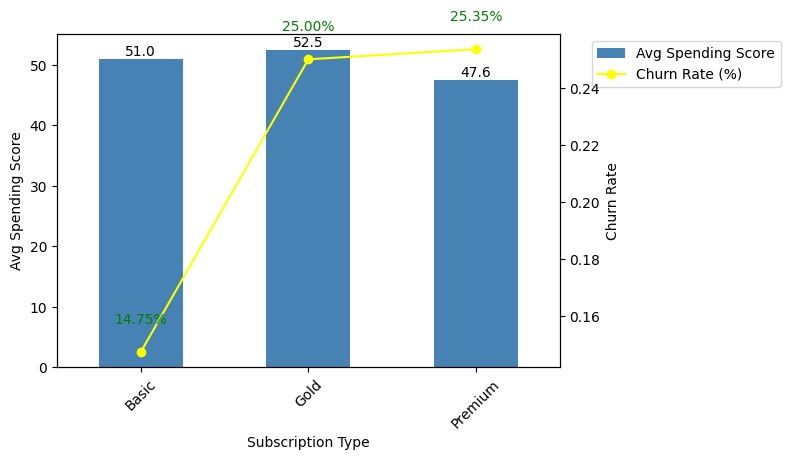

In [42]:
# gb1 = df.groupby('Subscription').agg({'SpendingScore': 'mean','Churn': lambda x: (x == 'Yes').mean()}).reset_index()

# ax= gb1.plot(kind='bar', x='Subscription', y='SpendingScore',secondary_y='Churn')

# plt.title('Average Income by City')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()
# import matplotlib.pyplot as plt

plt.figure(figsize=(20,5)) 
gb1 = df.groupby('Subscription').agg({ 'SpendingScore': 'mean','Churn': lambda x: (x == 'Yes').mean()}).reset_index()
ax = gb1.plot(kind='bar', x='Subscription',y='SpendingScore',legend=True,color='steelblue',label='Avg Spending Score')
ax2 = ax.twinx()
ax2.plot(gb1['Subscription'], gb1['Churn'],color='yellow',marker='o', label='Churn Rate (%)')


for idx, val in enumerate(gb1['SpendingScore']):
    ax.text(idx, val + 0.5, f'{val:.1f}', ha='center', color='black')

for idx, val in enumerate(gb1['Churn']):
    ax2.text(idx, val + 0.01, f'{val:.2%}', ha='center', color='green')


ax.set_ylabel('Avg Spending Score')
ax2.set_ylabel('Churn Rate')
ax.set_xlabel('Subscription Type')
# ax.set_title('Subscription Type vs Spending Score and Churn Rate')
plt.xticks(rotation=0)
plt.tight_layout()

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1.05, 1))
ax.set_xticklabels(gb1['Subscription'], rotation=45)
plt.show()



#This chart shows that **Gold and Premium users spend more but also leave more**, while **Basic users spend a bit less but are more loyal**.


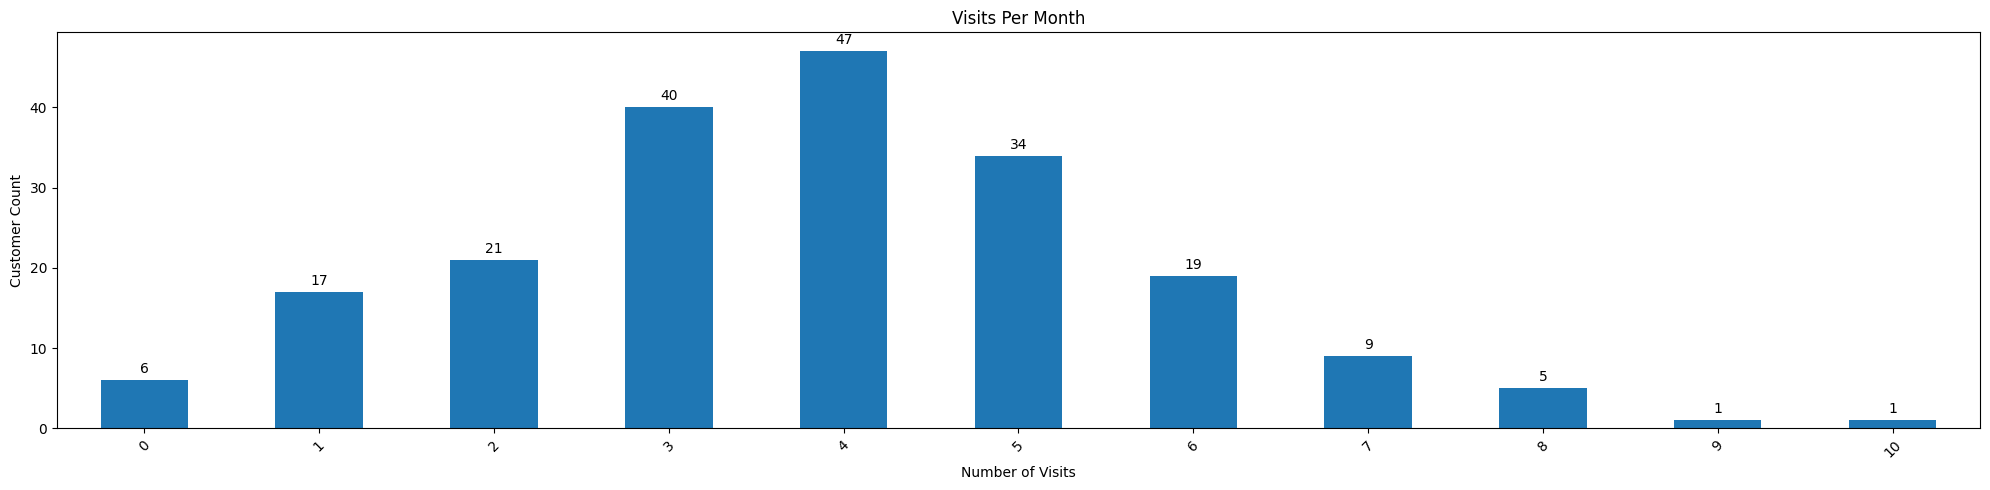

In [49]:


visit_counts= df['VisitsPerMonth'].value_counts().sort_index()


fig, ax = plt.subplots(figsize=(20, 5))
bars = visit_counts.plot(kind='bar', ax=ax)


for i, count in enumerate(visit_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)


ax.set_title('Visits Per Month')
ax.set_xlabel('Number of Visits')
ax.set_ylabel('Customer Count')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



#This bar chart shows how many customers visit each number of times per month, and the numbers on top make it easy to see that most people visit around 4–5 times.


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'CustomerID'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Income'),
  Text(3.5, 0, 'SpendingScore'),
  Text(4.5, 0, 'VisitsPerMonth')])

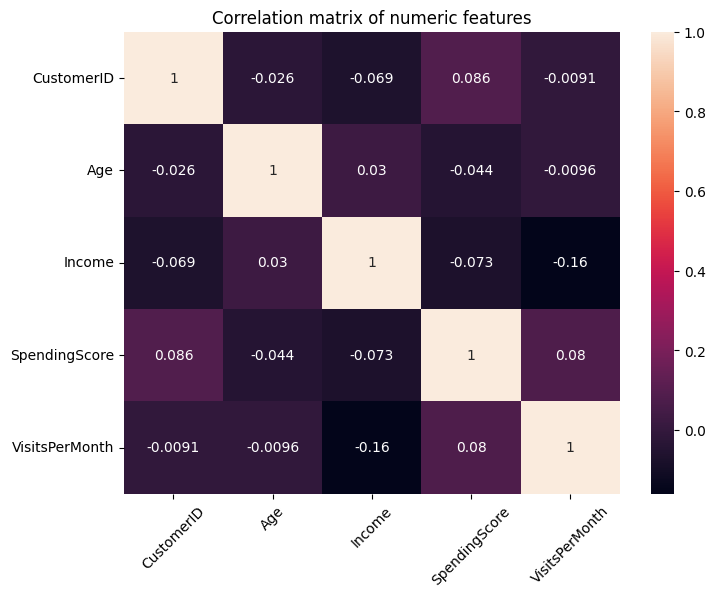

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title('Correlation matrix of numeric features')
plt.xticks(rotation=45)

#From the heatmap, we can observe that there are no strong relationships among the numeric features—age, income, spending score, and visits per month are all only weakly (or not at all) correlated with each other.

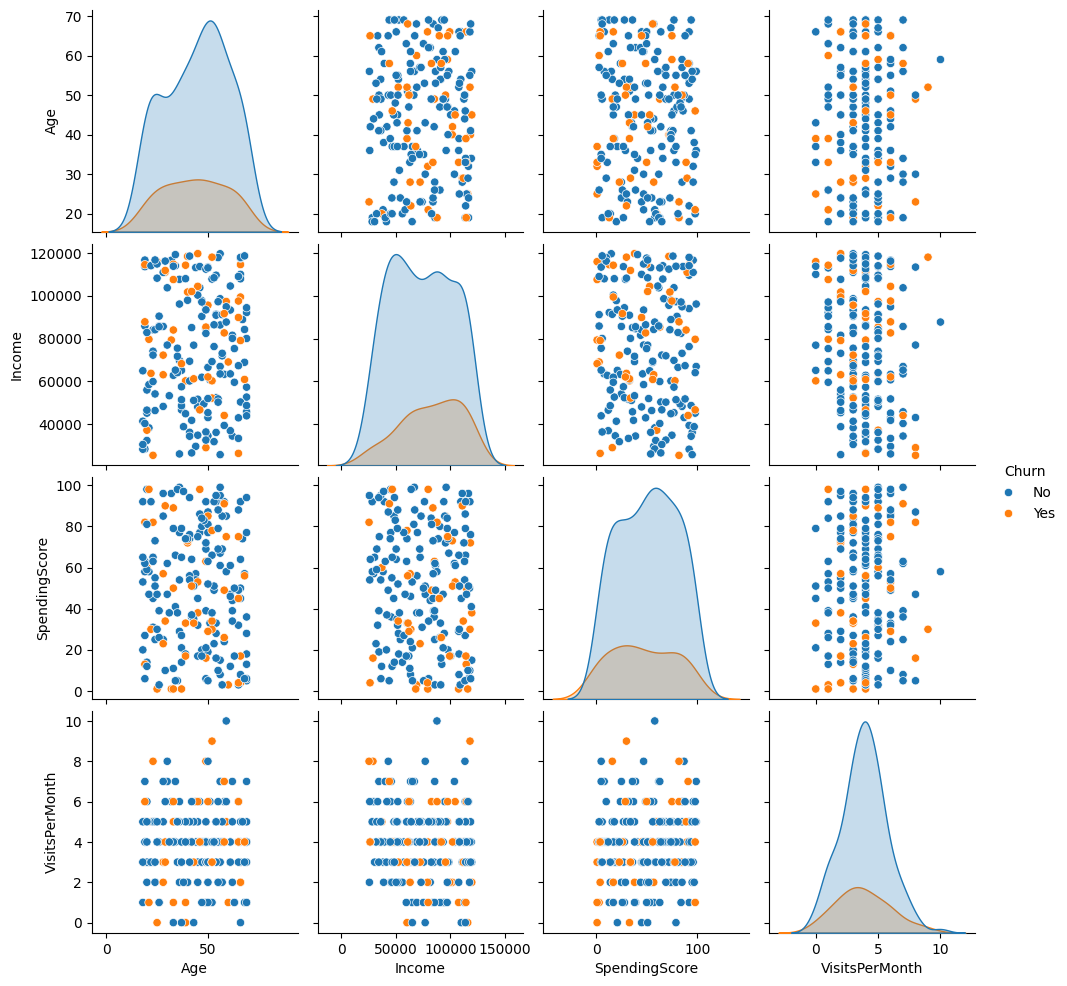

In [54]:
sns.pairplot(df[['Age', 'Income', 'SpendingScore', 'VisitsPerMonth','Churn']], hue='Churn')


#This chart helps us understand why some customers stop using the service (churn) and others stay. We looked at their age, income, spending habits, and how often they visit. Age and income don’t make much difference—people of all ages and income levels can leave or stay. But we noticed something important: customers who **spend less** and **visit less often** are more likely to leave. Especially those who visit only once a month or not at all — many of them end up leaving. So, the main takeaway is that if a customer isn’t active or spending much, they are more likely to churn. These are the people we should pay attention to and try to keep engaged.


In [57]:

df['SignupDate'] = pd.to_datetime(df['SignupDate'])

df['TenureDays'] = (pd.Timestamp.today() - df['SignupDate']).dt.days


<Axes: xlabel='Churn', ylabel='TenureDays'>

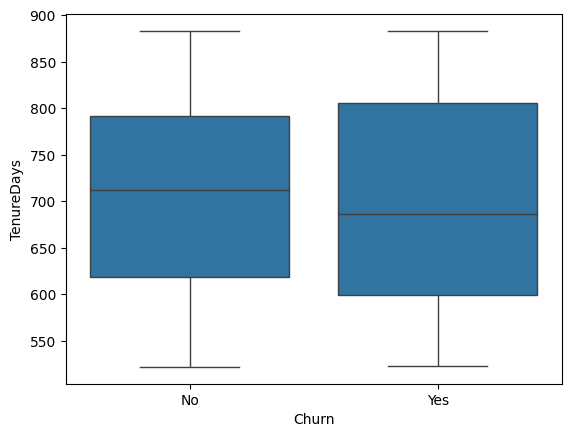

In [59]:

sns.boxplot(x='Churn', y='TenureDays', data=df)